In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df_train= pd.read_csv('mnist_train.csv')
df_train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [9]:
"""X = df_train.iloc[:,0:].values
Y = df_train.iloc[:,0].values"""

print(df_train.shape)
data_train = np.array(df_train)
m, n = data_train.shape
np.random.shuffle(data_train)

data_train = data_train[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



(55763, 785)


In [10]:
X_train[:,0].shape, Y_train.shape

((784,), (54763,))

In [11]:
X_train.shape

(784, 54763)

In [12]:
def reLU(Z):
    return np.maximum(0,Z)

def derivative_reLU(Z): 
    return Z>0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

    

def init_params():
    W1 = np.random.randn(128 ,784)
    b1 = np.random.randn(128,1)
    W2 = np.random.rand(10,128 )
    b2 = np.random.rand(10,1)
    return W1, b1, W2, b2


def forprop(W1, b1, W2, b2, X):
     Z1 = W1.dot(X) + b1
     A1 =  reLU(Z1)
     Z2 = W2.dot(A1) + b2
     A2 = softmax(Z2)
     return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backprop(Z1, Z2, A1, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_reLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T) 
    db1 = 1/m * np.sum(dZ1)
    return dW1,db1, dW2, db2
    
def params_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



    

In [ ]:
def pred(A2):
    return np.argmax(A2, axis=0)
def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1,b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forprop(W1, b1, W2, b2, X_train)
        dW1, db1, dW2, db2= backprop(Z1, Z2, A1, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = params_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10 == 0:
            print(f'Iteration {i}')
            predictions = pred(A2)
            print(accuracy(predictions, Y))
    return W1, b1, W2, b2



In [23]:
gradient_descent(X_train, Y_train, 60, 0.15)

Iteration 0
[3 3 6 ... 3 3 3] [9 9 4 ... 5 0 0]
0.08553220239943027
Iteration 5
[4 4 4 ... 5 0 4] [9 9 4 ... 5 0 0]
0.358234574438946
Iteration 10
[9 9 4 ... 5 0 4] [9 9 4 ... 5 0 0]
0.6385698372989062
Iteration 15
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.674835198948195
Iteration 20
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.6975877873746873
Iteration 25
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7149535270164162
Iteration 30
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.728521081752278
Iteration 35
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7381626280517868
Iteration 40
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7475302667859687
Iteration 45
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7542683928930117
Iteration 50
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.760896955973924
Iteration 55
[9 9 4 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7660646787064259


(array([[ 0.08622901, -0.04193227,  0.743688  , ..., -0.83814288,
          1.39578015,  0.82929811],
        [-0.08842621,  1.11398161,  0.32358295, ..., -1.10177068,
          0.63524903, -1.55168581],
        [-1.78692993,  0.42468809, -0.57064786, ..., -0.31313735,
          0.08562102,  1.28120172],
        ...,
        [ 1.74385963,  0.12086554,  0.59040337, ...,  2.91389683,
          1.14199563,  1.00135043],
        [-0.70400959, -0.73184978, -1.25898431, ...,  0.23769355,
         -0.19518904, -2.49690968],
        [-0.62464176, -0.38143827,  0.62434088, ...,  0.38973284,
          0.2576284 , -0.86439233]]),
 array([[-5.23053713],
        [-4.04441224],
        [-3.15640084],
        [-3.96956426],
        [-3.96660764],
        [-5.94031574],
        [-3.21955793],
        [-4.11106314],
        [-5.46543375],
        [-4.61558253],
        [-3.75225269],
        [-4.37010851],
        [-5.21011442],
        [-3.4791423 ],
        [-5.58317088],
        [-3.50747714],
     

In [24]:
def make_predictions(X,W1,b1, W2, b2):
     _ ,_, _, A2 = forprop(W1, b1, W2, b2, X)
     predictions = pred(A2)
     return predictions
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

In [27]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 60, 0.15)

Iteration 0
[8 8 8 ... 8 3 3] [9 9 4 ... 5 0 0]
0.11018388327885616
Iteration 5
[4 7 2 ... 4 0 0] [9 9 4 ... 5 0 0]
0.4758687434946953
Iteration 10
[8 9 2 ... 5 0 0] [9 9 4 ... 5 0 0]
0.6586016105764841
Iteration 15
[8 9 2 ... 5 0 0] [9 9 4 ... 5 0 0]
0.6966199806438654
Iteration 20
[8 9 2 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7190621404963206
Iteration 25
[8 9 2 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7357522414769095
Iteration 30
[8 9 2 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7484432920037252
Iteration 35
[8 9 2 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7593265525993828
Iteration 40
[9 9 9 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7674524770374158
Iteration 45
[9 9 9 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7753775359275423
Iteration 50
[9 9 9 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7810017712689225
Iteration 55
[9 9 9 ... 5 0 0] [9 9 4 ... 5 0 0]
0.7862973175319102


Prediction:  [6]
Label:  6


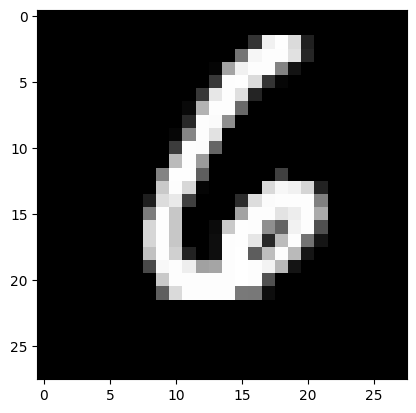

In [28]:
test_prediction(4, W1, b1, W2, b2)

Prediction:  [1]
Label:  1


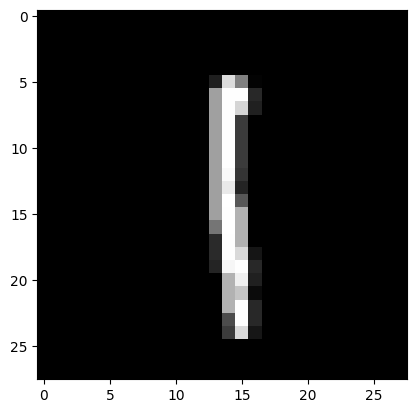

In [29]:
test_prediction(18, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


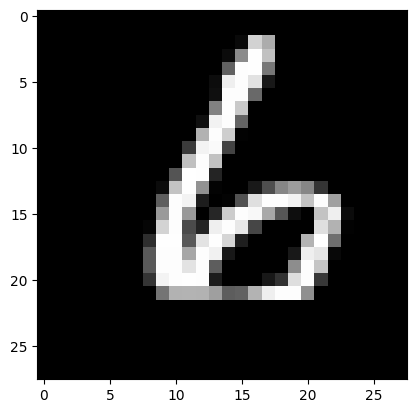

In [35]:
test_prediction(200, W1, b1, W2, b2)

Prediction:  [8]
Label:  0


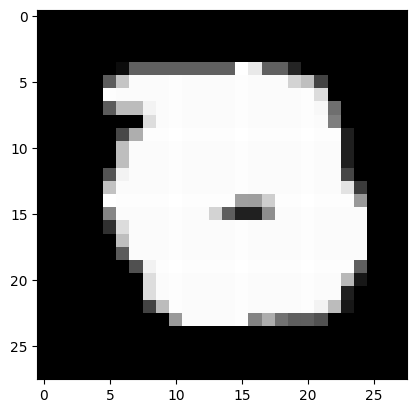

In [30]:
test_prediction(940, W1, b1, W2, b2)

In [31]:
df_test = pd.read_csv('mnist_test.csv')
p,k = df_test.shape

In [32]:
data_test = np.array(df_test).T
Y_test = data_test[0]
X_test = data_test[1:k]

def make_predictions_test(X,W1,b1, W2, b2):
     _ ,_, _, A2 = forprop(W1, b1, W2, b2, X)
     predictions = pred(A2)
     return predictions
def test_prediction_test(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    


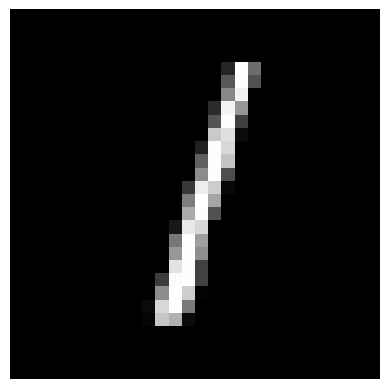

In [33]:
current_image = X_test[:, 2]
current_image = current_image.reshape(28, 28)
plt.imshow(current_image, cmap="gray")
plt.axis("off")
plt.show()



Prediction:  [0]
Label:  0


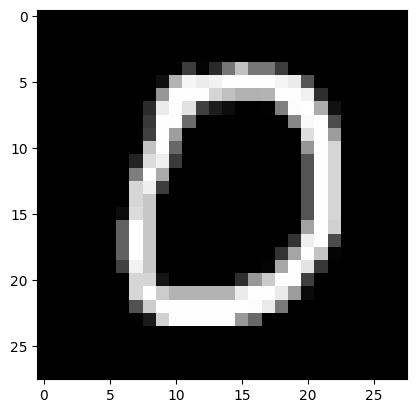

In [34]:
test_prediction_test(10, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


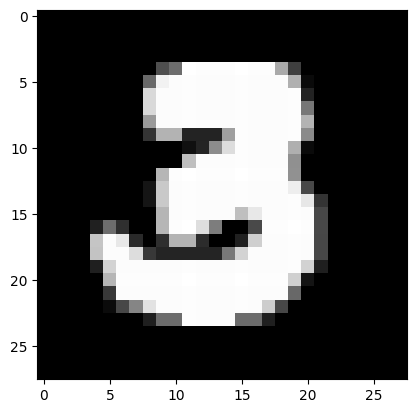

In [35]:
test_prediction_test(200,W1, b1, W2, b2)

Prediction:  [9]
Label:  9


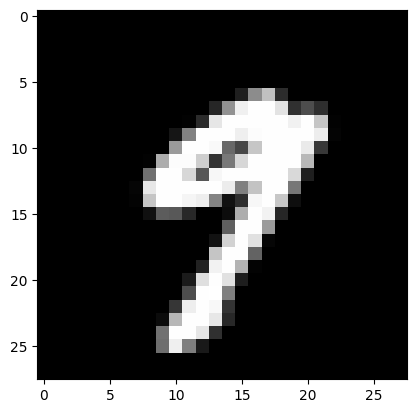

In [36]:
test_prediction_test(20,W1, b1, W2, b2)

Second Part

In [37]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import io
import numpy as np
import cv2
import torchvision
import torchvision.transforms as transforms


In [ ]:
dataset = MNIST(root='./data', train= True, download=True, transform= transforms.ToTensor())
mnist_train, mnist_val = random_split(dataset, [55000,5000])

train_loader = DataLoader(mnist_train, batch_size = 128,drop_last = True, shuffle = True)
val_loader = DataLoader(mnist_val, batch_size = 128, drop_last= False, shuffle = True)



model = nn.Sequential(nn.Flatten(),
                            nn.Linear(784,128), 
                            nn.ReLU(),
                            nn.Linear(128,10)                             
)

loss = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#Training
model.train()
total_correct_test = 0
total_samples_test = 0
n_epochs = 10
for epoch in range(n_epochs):
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        output = model(xb)
        l = loss(output, yb)
        l.backward()
        optimizer.step()
        total_correct_test += (output.argmax(dim = 1) == yb).sum().item()
        total_samples_test += yb.size(0)
        train_acc = total_correct_test/total_samples_test
    print(f'epoch {epoch} : train_acc = {train_acc:.4f}')





epoch 0 = train_acc = 0.9298
epoch 1 = train_acc = 0.9476
epoch 2 = train_acc = 0.9559
epoch 3 = train_acc = 0.9614
epoch 4 = train_acc = 0.9647
epoch 5 = train_acc = 0.9673
epoch 6 = train_acc = 0.9697
epoch 7 = train_acc = 0.9715
epoch 8 = train_acc = 0.9729
epoch 9 = train_acc = 0.9743


In [49]:
#Validation
model.eval()
total_correct = 0
total_samples = 0
with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        output = model(xb)
        pred = output.argmax(dim=1)  
        total_correct += (pred == yb).sum().item()
        total_samples += yb.size(0)
    val_acc = total_correct / total_samples
    print(f" val_acc = {val_acc:.4f}")

 val_acc = 0.9680


In [54]:
#Test
dataset_test = MNIST(root='./data', train= False , download=True, transform= transforms.ToTensor())
mnist_test = DataLoader(dataset_test, batch_size = 128, shuffle = True, drop_last = False)
model.eval()
total_correct_test = 0
total_samples_test = 0
all_error_images = []
all_imgs, all_true, all_pred = [] , [], []
with torch.no_grad():
    for xb, yb in mnist_test:
        xb, yb = xb.to(device), yb.to(device)
        output = model(xb)
        pred = output.argmax(dim = 1)
        error_idx = ((pred != yb).nonzero(as_tuple=True)[0])
        error_image= xb[error_idx].cpu()
        true_label = yb[error_idx]
        pred_label = pred[error_idx]
        all_error_images.append(error_image)
        all_pred.append(pred_label)
        total_correct_test += (pred ==yb).sum().item()
        total_samples_test += yb.size(0)
    test_acc = total_correct_test/total_samples_test
    print(f" test_accuracy = {test_acc:.4f}")
    all_error_images = torch.cat(all_error_images, dim=0)
    all_pred = torch.cat(all_pred, dim = 0)



 test_accuracy = 0.9687


Predicted label : 0


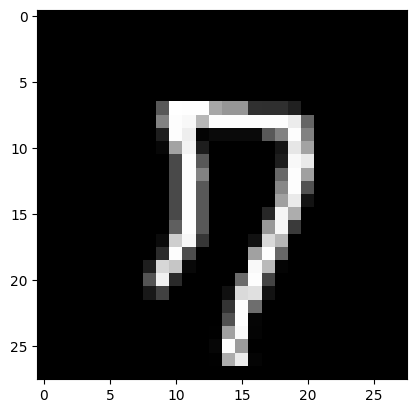

Predicted label : 2


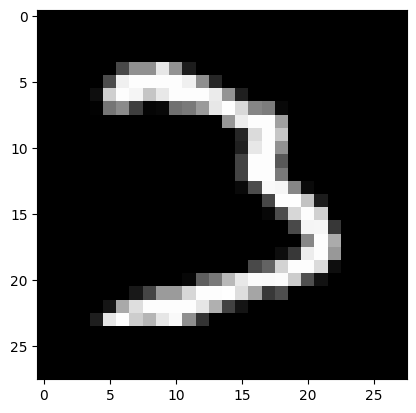

Predicted label : 9


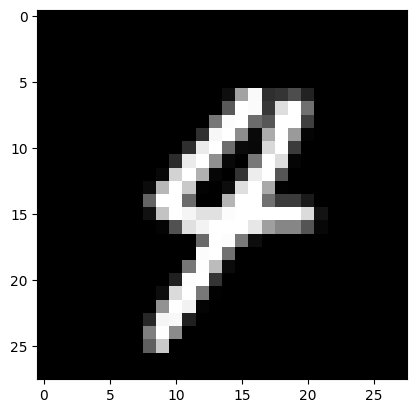

Predicted label : 5


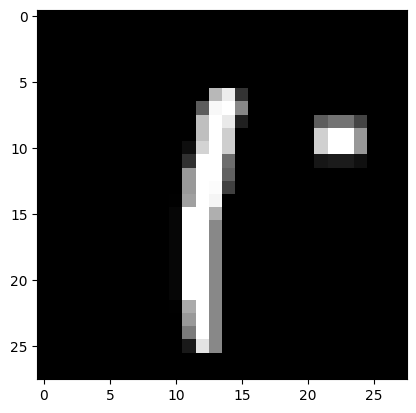

Predicted label : 6


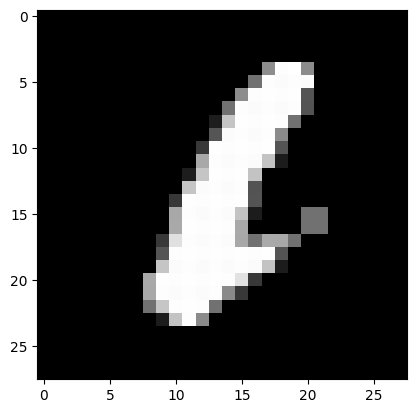

Predicted label : 2


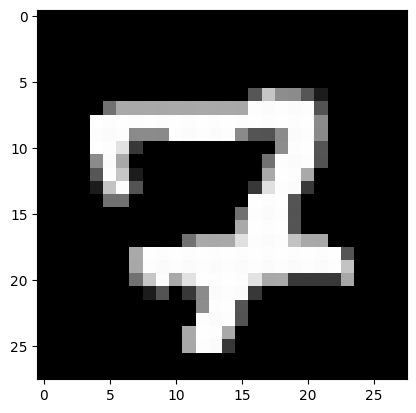

Predicted label : 8


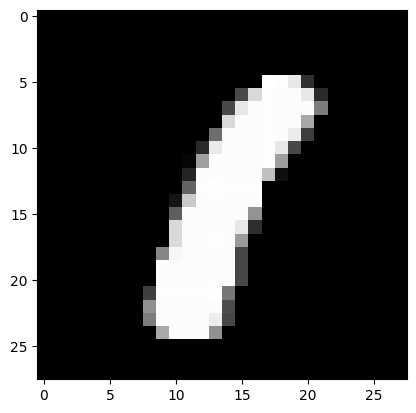

Predicted label : 8


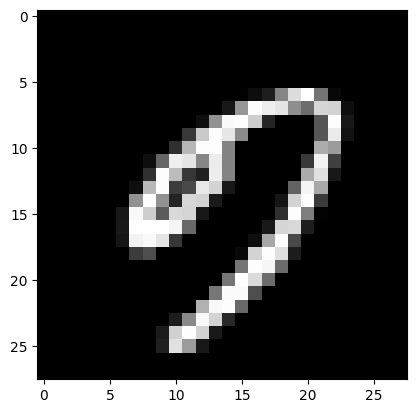

Predicted label : 7


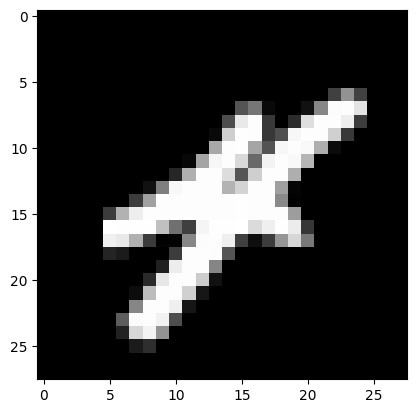

Predicted label : 0


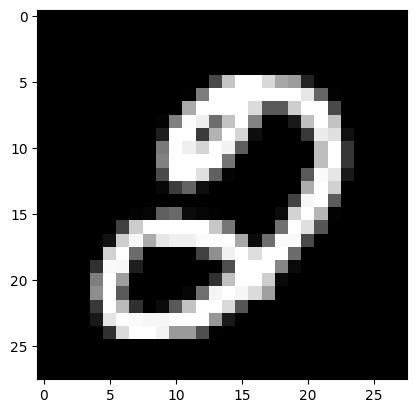

In [58]:
for i in range(10):  # afficher les 10 premières erreurs
    print(f'Predicted label : {all_pred[i].item()}')
    plt.imshow(all_error_images[i].squeeze(0), cmap='gray')
    plt.show()